In [1]:
#### Importing Libraries ####

import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
# import the data
dataset = pd.read_csv('/Users/monipeni/Documents/Machine Learning Practical/Module 3/appdata10.csv')

In [3]:
# Viewing the Data
dataset.head(10) 

user               first_open  dayofweek       hour  age  \
0  235136  2012-12-27 02:14:51.273          3   02:00:00   23   
1  333588  2012-12-02 01:16:00.905          6   01:00:00   24   
2  254414  2013-03-19 19:19:09.157          1   19:00:00   23   
3  234192  2013-07-05 16:08:46.354          4   16:00:00   28   
4   51549  2013-02-26 18:50:48.661          1   18:00:00   31   
5   56480  2013-04-03 09:58:15.752          2   09:00:00   20   
6  144649  2012-12-25 02:33:18.461          1   02:00:00   35   
7  249366  2012-12-11 03:07:49.875          1   03:00:00   26   
8  372004  2013-03-20 14:22:01.569          2   14:00:00   29   
9  338013  2013-04-26 18:22:16.013          4   18:00:00   26   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   
5  idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...          14         0   
6         product_review,product_review2,ScanPreview           3         0   
7  Splash,Cycle,Home,Credit3Container,Credit3Dash...          41         0   
8  product_review,product_review2,ScanPreview,Ver...          33         1   
9  Home,Loan2,product_review,product_review,produ...          19         0   

   used_premium_feature  enrolled            enrolled_date  liked  
0                     0         0                      NaN      0  
1                     0         0                      NaN      0  
2                     1         0                      NaN      1  
3                     0         1  2013-07-05 16:11:49.513      0  
4                     0         1  2013-02-26 18:56:37.841      1  
5                     0         1  2013-04-03 09:59:03.291      0  
6                     0         0                      NaN      0  
7                     1         0                      NaN      0  
8                     1         1  2013-04-27 22:24:54.542      0  
9                     0         1  2013-04-26 18:31:58.923      0

In [4]:
# Distribution of Numerical Variables
dataset.describe()

user     dayofweek          age    numscreens      minigame  \
count   50000.000000  50000.000000  50000.00000  50000.000000  50000.000000   
mean   186889.729900      3.029860     31.72436     21.095900      0.107820   
std    107768.520361      2.031997     10.80331     15.728812      0.310156   
min        13.000000      0.000000     16.00000      1.000000      0.000000   
25%     93526.750000      1.000000     24.00000     10.000000      0.000000   
50%    187193.500000      3.000000     29.00000     18.000000      0.000000   
75%    279984.250000      5.000000     37.00000     28.000000      0.000000   
max    373662.000000      6.000000    101.00000    325.000000      1.000000   

       used_premium_feature      enrolled         liked  
count          50000.000000  50000.000000  50000.000000  
mean               0.172020      0.621480      0.165000  
std                0.377402      0.485023      0.371184  
min                0.000000      0.000000      0.000000  
25%                0.000000      0.000000      0.000000  
50%                0.000000      1.000000      0.000000  
75%                0.000000      1.000000      0.000000  
max                1.000000      1.000000      1.000000

In [5]:
# First set of Feature cleaning
dataset["hour"] = dataset.hour.str.slice(1, 3).astype(int) #(1,3) because we only want the first 2 numbers

In [6]:
### Plotting (drop columns that we don´t want)
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date',
                                           'first_open', 'enrolled'])
dataset2.head()

dayofweek  hour  age  numscreens  minigame  used_premium_feature  liked
0          3     2   23          15         0                     0      0
1          6     1   24          13         0                     0      0
2          1    19   23           3         0                     1      1
3          4    16   28          40         0                     0      0
4          1    18   31          32         0                     0      1

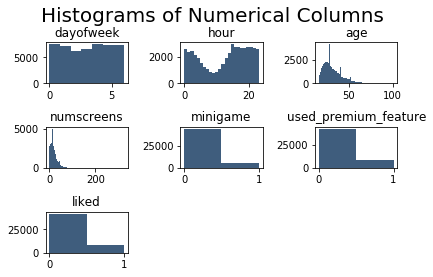

In [7]:
## Histograms
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1): #we add +1 because Python don´t add the last one
    plt.subplot(3, 3, i) # number of dimensions
    f = plt.gca()
#    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1]) # title each feature

    vals = np.size(dataset2.iloc[:, i - 1].unique()) # how many bins is Python gonna use for each histogram, we select 
                                        # all the futures and the entire column with iloc, and then with unique
                                        # we get all the unique values, it's the size, how big all the unique values are
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.savefig('app_data_hist.jpg')

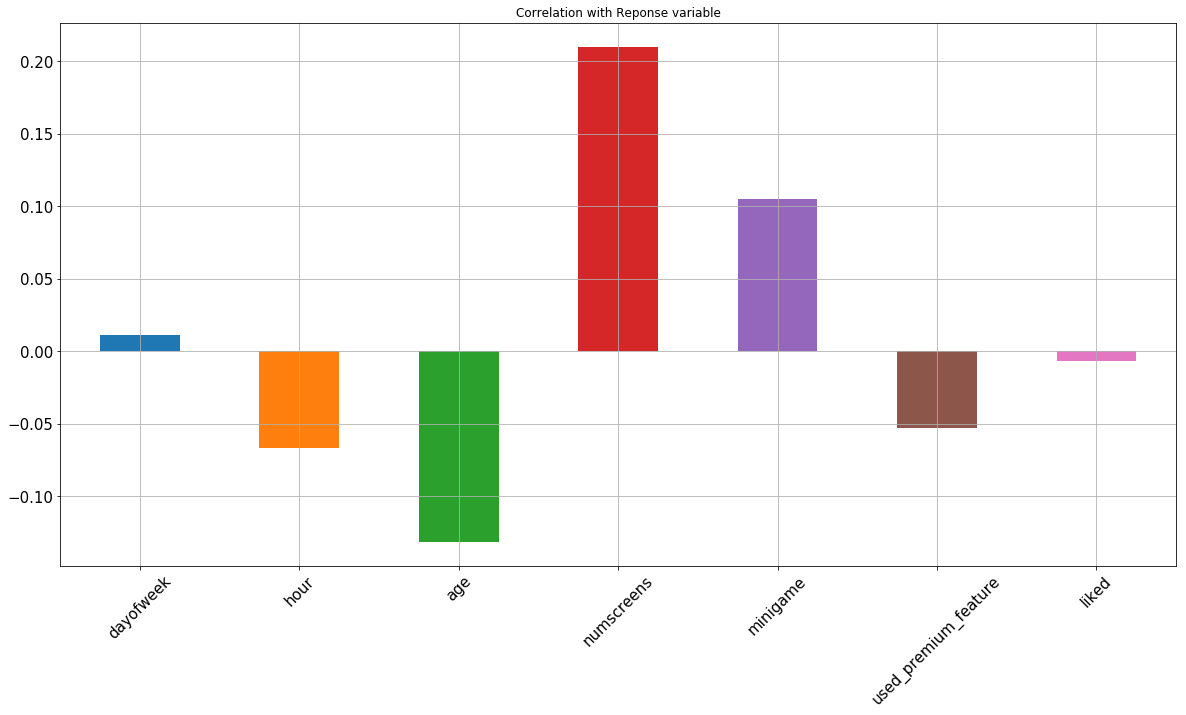

In [9]:
## Correlation with Response Variable
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(20,10),
                  title = 'Correlation with Reponse variable',
                  fontsize = 15, rot = 45,
                  grid = True)

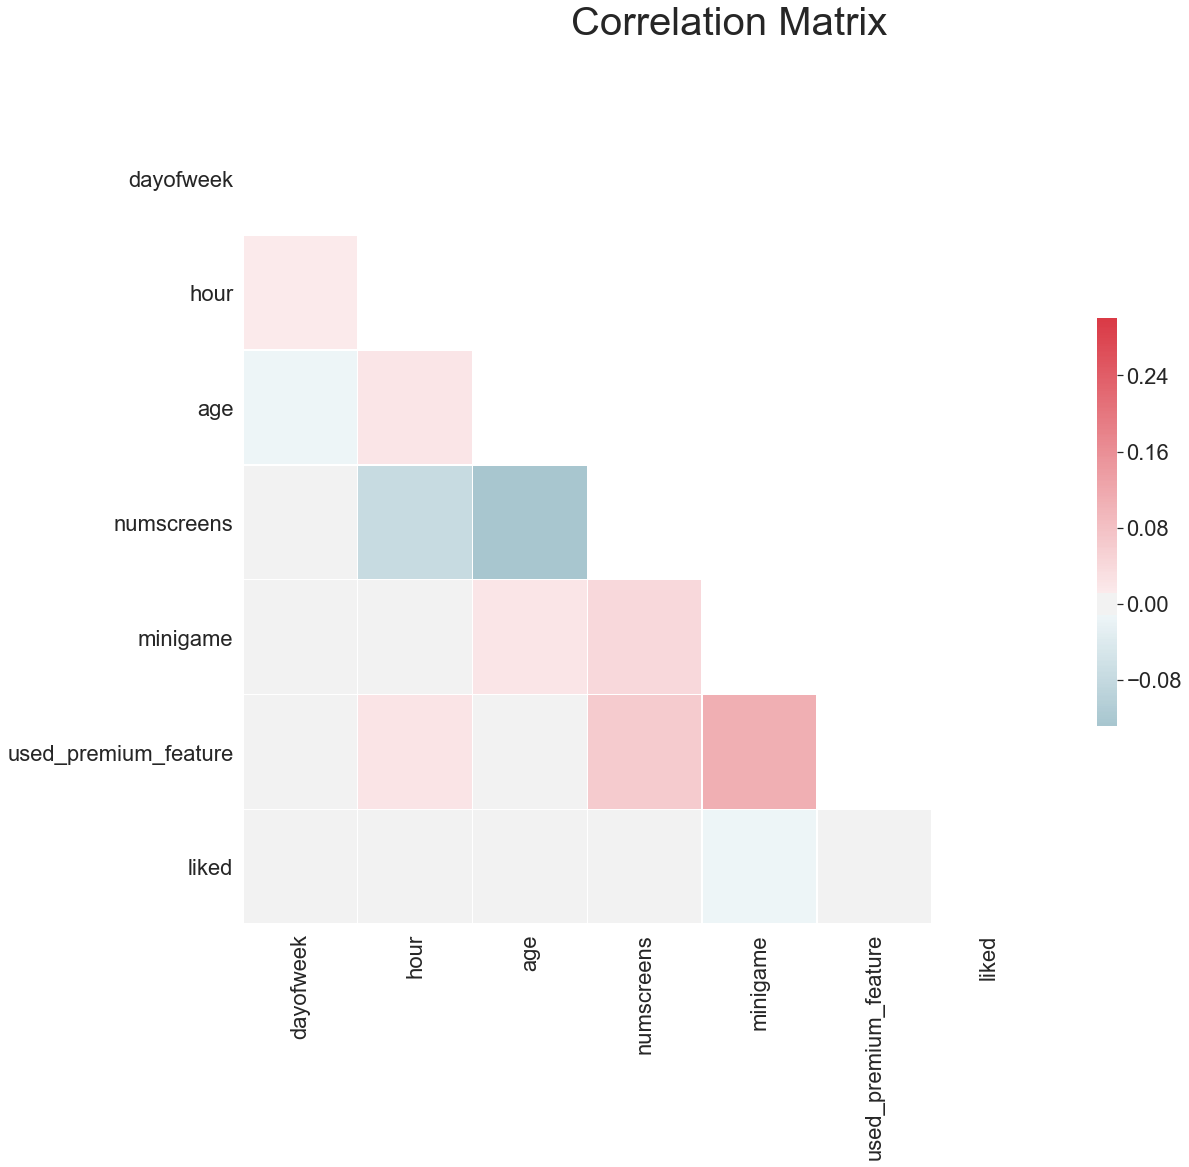

In [16]:
## Correlation Matrix
sn.set(style="white", font_scale=2)

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
# the grey color is 0, means have no correlation. Exemple: day of the week is a little bit correlated with age in 
# the negative sense, it´s a little bit blue (later the day of the week, the smaller the age). Maybe at the weekends
# more young people use the app and in week days other people use it

In [18]:
#### Feature Engineering ####

dataset.dtypes


user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [19]:
# Formatting Date Columns (we are going to convert the object first open and enrolled date in date time objects)

dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

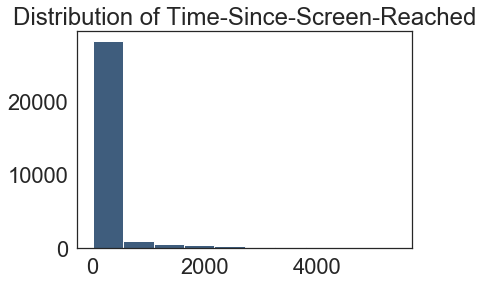

In [20]:
# Selecting Time For Response
dataset["difference"] = (dataset.enrolled_date-dataset.first_open).astype('timedelta64[h]') #to convert the difference in hours we us astype('timedelta64[h]')
response_hist = plt.hist(dataset["difference"].dropna(), color='#3F5D7D')
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

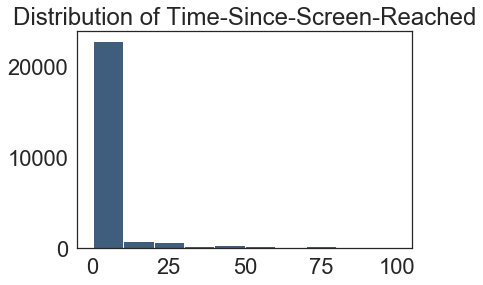

In [21]:
plt.hist(dataset["difference"].dropna(), color='#3F5D7D', range = [0, 100])
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

In [22]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0 # remove people that are more than 48 h, because in the plot we can see
                                                    # that people subscription in less than 48 h
dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open']) # eliminated this features

In [23]:
## Formatting the screen_list Field

# Load Top Screens
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [24]:
# Mapping Screens to Fields
dataset["screen_list"] = dataset.screen_list.astype(str) + ','

for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")

dataset['Other'] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns=['screen_list'])

In [25]:
# Funnels
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns=savings_screens)

cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [27]:
# see the results
dataset.head()

user  dayofweek  hour  age  numscreens  minigame  used_premium_feature  \
0  235136          3     2   23          15         0                     0   
1  333588          6     1   24          13         0                     0   
2  254414          1    19   23           3         0                     1   
3  234192          4    16   28          40         0                     0   
4   51549          1    18   31          32         0                     0   

   enrolled  liked  location     ...      SecurityModal  ResendToken  \
0         0      0         0     ...                  0            0   
1         0      0         1     ...                  0            0   
2         0      1         0     ...                  0            0   
3         1      0         1     ...                  0            0   
4         1      1         0     ...                  0            0   

   TransactionList  NetworkFailure  ListPicker  Other  SavingCount  CMCount  \
0                0               0           0      7            0        0   
1                0               0           0      5            0        0   
2                0               0           0      0            0        0   
3                0               0           0      6            0        3   
4                0               0           0     10            0        2   

   CCCount  LoansCount  
0        0           1  
1        0           1  
2        0           1  
3        0           1  
4        0           1  

[5 rows x 50 columns]

In [28]:
dataset.describe()

user     dayofweek          hour          age    numscreens  \
count   50000.000000  50000.000000  50000.000000  50000.00000  50000.000000   
mean   186889.729900      3.029860     12.557220     31.72436     21.095900   
std    107768.520361      2.031997      7.438072     10.80331     15.728812   
min        13.000000      0.000000      0.000000     16.00000      1.000000   
25%     93526.750000      1.000000      5.000000     24.00000     10.000000   
50%    187193.500000      3.000000     14.000000     29.00000     18.000000   
75%    279984.250000      5.000000     19.000000     37.00000     28.000000   
max    373662.000000      6.000000     23.000000    101.00000    325.000000   

           minigame  used_premium_feature      enrolled         liked  \
count  50000.000000          50000.000000  50000.000000  50000.000000   
mean       0.107820              0.172020      0.497000      0.165000   
std        0.310156              0.377402      0.499996      0.371184   
min        0.000000              0.000000      0.000000      0.000000   
25%        0.000000              0.000000      0.000000      0.000000   
50%        0.000000              0.000000      0.000000      0.000000   
75%        0.000000              0.000000      1.000000      0.000000   
max        1.000000              1.000000      1.000000      1.000000   

           location      ...       SecurityModal   ResendToken  \
count  50000.000000      ...        50000.000000  50000.000000   
mean       0.517760      ...            0.014220      0.013340   
std        0.499689      ...            0.118398      0.114727   
min        0.000000      ...            0.000000      0.000000   
25%        0.000000      ...            0.000000      0.000000   
50%        1.000000      ...            0.000000      0.000000   
75%        1.000000      ...            0.000000      0.000000   
max        1.000000      ...            1.000000      1.000000   

       TransactionList  NetworkFailure    ListPicker         Other  \
count     50000.000000    50000.000000  50000.000000  50000.000000   
mean          0.013400        0.008200      0.007580      6.214260   
std           0.114981        0.090183      0.086733      3.672561   
min           0.000000        0.000000      0.000000      0.000000   
25%           0.000000        0.000000      0.000000      3.000000   
50%           0.000000        0.000000      0.000000      6.000000   
75%           0.000000        0.000000      0.000000      8.000000   
max           1.000000        1.000000      1.000000     35.000000   

        SavingCount      CMCount       CCCount    LoansCount  
count  50000.000000  50000.00000  50000.000000  50000.000000  
mean       0.365020      0.92776      0.176860      0.788400  
std        1.405511      1.21751      0.612787      0.677462  
min        0.000000      0.00000      0.000000      0.000000  
25%        0.000000      0.00000      0.000000      0.000000  
50%        0.000000      0.00000      0.000000      1.000000  
75%        0.000000      1.00000      0.000000      1.000000  
max       10.000000      5.00000      3.000000      3.000000  

[8 rows x 50 columns]

In [29]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [31]:
#### Saving Results ####
dataset.to_csv('new_appdata10.csv', index = False)

In [32]:
#### Importing Libraries ####

import time

In [33]:
#### Data Pre-Processing ####

# Splitting Independent and Response Variables
response = dataset["enrolled"]
dataset = dataset.drop(columns="enrolled")

In [34]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [35]:
## Balancing the Training Set
#import random
#y_train.value_counts()
#
#pos_index = y_train[y_train.values == 1].index
#neg_index = y_train[y_train.values == 0].index
#
#if len(pos_index) > len(neg_index):
#    higher = pos_index
#    lower = neg_index
#else:
#    higher = neg_index
#    lower = pos_index
#
#random.seed(0)
#higher = np.random.choice(higher, size=len(lower))
#lower = np.asarray(lower)
#new_indexes = np.concatenate((lower, higher))
#
#X_train = X_train.loc[new_indexes,]
#y_train = y_train[new_indexes]

In [36]:
# Removing Identifiers
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

In [37]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

/Users/monipeni/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/monipeni/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/monipeni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [38]:
#### Model Building ####


# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(X_train, y_train)

/Users/monipeni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

Test Data Accuracy: 0.7681


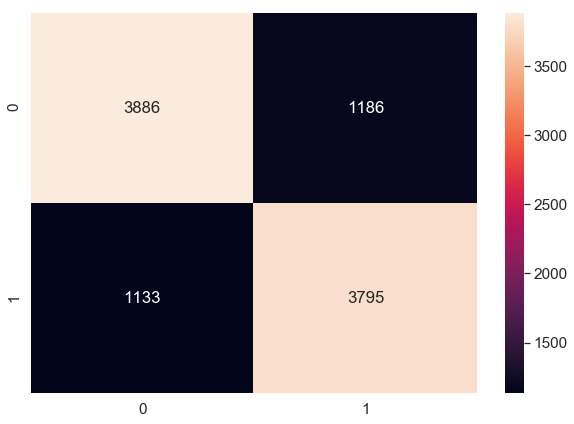

In [40]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # tp / (tp + fp)
recall_score(y_test, y_pred) # tp / (tp + fn)
f1_score(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [41]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

/Users/monipeni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/monipeni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/monipeni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/monipeni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/monipeni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

SVM Accuracy: 0.767 (+/- 0.009)


In [42]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(dataset.drop(columns = 'user').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

features      coef
0                 dayofweek  0.032581
1                      hour -0.003596
2                       age -0.149686
3                numscreens -0.130704
4                  minigame -0.026455
5      used_premium_feature -0.065897
6                     liked  0.010698
7                  location -0.028322
8              Institutions -0.062203
9               VerifyPhone  0.650350
10         BankVerification  0.050448
11        VerifyDateOfBirth  0.123863
12              ProfilePage -0.123929
13            VerifyCountry -0.317733
14                    Cycle  0.007311
15                 idscreen  0.163287
16                   Splash  0.025069
17         RewardsContainer -0.007415
18              EditProfile  0.044375
19                 Finances  0.019807
20                   Alerts -0.211638
21              Leaderboard -0.006523
22             VerifyMobile  0.309493
23            VerifyHousing  0.059404
24             RewardDetail -0.002795
25      VerifyHousingAmount  0.038297
26     ProfileMaritalStatus -0.062603
27         ProfileChildren   0.000000
28         ProfileEducation -0.000061
29    ProfileEducationMajor -0.024785
30                  Rewards  0.047592
31              AccountView -0.049907
32       VerifyAnnualIncome  0.087976
33         VerifyIncomeType -0.073395
34          ProfileJobTitle  0.009389
35                    Login -0.103641
36  ProfileEmploymentLength -0.054200
37                  WebView -0.067391
38            SecurityModal  0.012335
39              ResendToken -0.067556
40          TransactionList -0.048699
41           NetworkFailure -0.006454
42               ListPicker -0.033418
43                    Other  0.952678
44              SavingCount  0.000470
45                  CMCount  0.576298
46                  CCCount  0.029529
47               LoansCount -0.490041

In [43]:
#### Model Tuning ####

## Grid Search (Round 1)
from sklearn.model_selection import GridSearchCV

In [44]:
# Select Regularization Method
penalty = ['l1', 'l2']

In [45]:
# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [46]:
# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

/Users/monipeni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Took 39.62 seconds


In [47]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.7674, {'C': 0.01, 'penalty': 'l2'})

In [48]:
## Grid Search (Round 2)

# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.1, 0.5, 0.9, 1, 2, 5]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters
grid_search.best_score_

/Users/monipeni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Took 36.33 seconds


0.767225

In [51]:
#### End of Model ####


# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)
final_results

user  enrolled  predicted_reach
0     239786         1                1
1     279644         1                1
2      98290         0                0
3     170150         1                1
4     237568         1                1
5      65042         1                0
6     207226         1                1
7     363062         0                0
8     152296         1                1
9      64484         0                0
10     38108         1                1
11    359940         0                0
12    136089         0                0
13     14231         1                1
14    216038         0                0
15     18918         1                1
16    316730         1                1
17     28308         1                0
18    228387         1                0
19     69640         1                1
20    358264         0                0
21    348059         0                0
22    178743         1                1
23    167556         0                0
24    294101         0                0
25    192801         0                1
26    163983         1                1
27    298830         0                0
28    151790         1                1
29     20200         1                1
...      ...       ...              ...
9970  348989         0                1
9971  248593         1                0
9972  316086         1                1
9973  192540         1                1
9974  256833         0                0
9975  273991         1                1
9976  365937         0                0
9977  295129         0                0
9978  255715         1                0
9979   37332         0                1
9980  164886         1                1
9981  309967         0                1
9982   14907         0                0
9983  244737         1                1
9984  284862         0                1
9985   60719         1                1
9986  262103         1                0
9987  243679         1                1
9988  280000         1                1
9989  255074         0                0
9990  347521         0                0
9991  335029         1                0
9992   37271         1                0
9993  240006         1                1
9994  279449         0                1
9995  143036         1                0
9996   91158         1                1
9997  248318         0                0
9998  142418         1                1
9999  279355         1                1

[10000 rows x 3 columns]